# 다중퍼셉트론(MultiLayer Perceptron)


## 0.환경설정

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


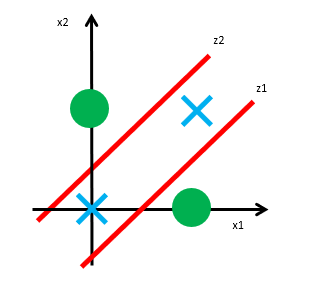

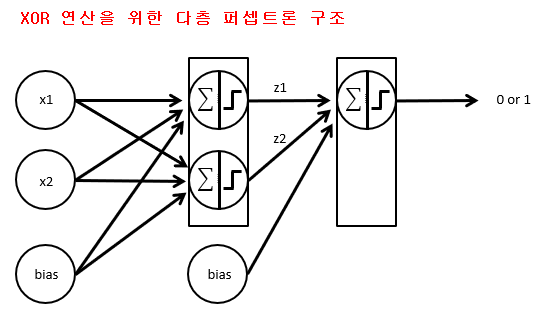

## 1.기본설정

+ XOR 연산은 입력데이터를 X라고 할 경우 [[0,0], [0,1], [1,0], [1,1]]과 같은 경우의 수가 있다.
+ 총 4개의 데이터가 2개의 아이템을 가지고 있으므로 X는 [4,2]의 형태로 정의할 수 있다.
+ 입력값에 따른 출력값 Y는 [[0], [1], [1], [0]]이므로 Y는 [4,1]의 형태로 정의할 수 있다.

In [2]:
# X:입력값, Y:출력값
X = tf.placeholder(tf.float32, shape=[4,2])
Y = tf.placeholder(tf.float32, shape=[4,1])

## 2. 히든레이어

+ 첫 번째 히든 레이어에서 2개의 입력(X)과 한 개의 편향값(B1)을 받아 2개의 시그모이드 출력(Z)을 다음 레이어로 전달한다

In [9]:
# 2개의 입력을 받는 2개의 뉴런을 만든다
# random_normal() : 정규분포로 부터의 난수값을 반환함
# random_uniform() : 균등분포로 부터의 난수값을 반환함
W1 = tf.Variable(tf.random_uniform([2,2]))

# 각 뉴런은 1개의 편향값을 가진다.
# zeros() : 모든 원소의 값이 0인 텐서를 생성함
B1 = tf.Variable(tf.zeros([2]))

# 시그모이드를 거쳐 출력값으로 Z를 반환한다
# sigmoid(W1 * X + B1)
Z = tf.sigmoid(tf.matmul(X, W1) + B1)

# sess = tf.Session()
# sess.run(tf.global_variables_initializer())
# print(sess.run(W1), sess.run(B1), sess.run(Z))

+ 2번째 히든 레이어는 1번째 히든 레이어의 출력값인 Z와 1개의 편향값(B2)를 받아 1개의 시그모이드를 출력(Y_hat)한다.

In [11]:
# Z를 입력값으로 받는 1개의 뉴런을 만든다.
W2 = tf.Variable(tf.random_uniform([2,1]))

# 각 뉴런은 1개의 편향값을 가진다.
# zeros() : 모든 원소의 값이 0인 텐서를 생성함
B2 = tf.Variable(tf.zeros([1]))

# 시그모이드를 거쳐 출력값으로 Y_hat를 반환한다
# sigmoid(W2 * Z + B2)
Y_hat = tf.sigmoid(tf.matmul(Z, W2) + B2)

## 3. 손실함수와 매개변수 최적화

+ 손실함수로 크로스 엔트로피를 사용한다.
+ 경사하강법으로 모델의 매개변수(가중치, 편향값)을 최적화한다.

In [12]:
# 크로스 엔트로피
loss = tf.reduce_mean(-1 * ( 
    Y*tf.log(Y_hat) + (1-Y)*tf.log(1.0-Y_hat) 
) )

# 경사 하강법
# 학습율 : 0.05
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

## 4. 학습

In [13]:
# 모델을 학습하기 위한 학습 데이터를 만든다.
train_X = [[0,0], [0,1], [1,0], [1,1]]
train_Y = [[0], [1], [1], [0]]

In [20]:
with tf.Session() as sess:
    # 변수 초기화
    sess.run(tf.global_variables_initializer()) 
    
    print('학습 데이터 : {}'.format(train_X))
    print('='*60)
    
    # 2만 번의 반복 학습을 진행한다.
    for i in range(20000):
        sess.run(train_step, feed_dict={X:train_X, Y:train_Y})
        if i%5000 == 0:
            print('epoch:{0:5d}'.format(i))
            print('output: \n{}'.format(sess.run(Y_hat, feed_dict={X:train_X, Y:train_Y})))
            
    print('='*60)
    print('최종 학습 결과: \n{}'.format(sess.run(Y_hat, feed_dict={X:train_X, Y:train_Y})))

학습 데이터 : [[0, 0], [0, 1], [1, 0], [1, 1]]
epoch:    0
output: 
[[0.6899355 ]
 [0.7567196 ]
 [0.70909595]
 [0.76982325]]
epoch: 5000
output: 
[[0.30874485]
 [0.5602676 ]
 [0.5729238 ]
 [0.59002995]]
epoch:10000
output: 
[[0.08472475]
 [0.90333974]
 [0.90305436]
 [0.12844518]]
epoch:15000
output: 
[[0.03363469]
 [0.97147125]
 [0.971406  ]
 [0.03303844]]
최종 학습 결과: 
[[0.02034739]
 [0.9839543 ]
 [0.98392606]
 [0.01782191]]


> XOR처럼 1,4번째 숫자는 점점 줄어들고, 2,3번째 숫자는 점점 늘어남